In [1]:
surname = "Голубятников"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  3
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  2


<h1>Задание 1. Анализ индикаторов качества государственного управления 
            (The Worldwide Government Indicators, WGI)</h1>

Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import gridspec

**1. Загрузка данных в DataFrame**

In [3]:
page_number = 6
df = pd.read_excel('wgidataset.xlsx', sheet_name=page_number, header = 14)
df

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,78.571426,62.857143,89.047623,0.756785,0.317250,2.0,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719


**2. Датасет отсортированный по убыванию индекса**

In [4]:
df_sorted = df.sort_index(ascending=False)
df_sorted

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


Выведем название страны, код и rank за 2022 год

In [5]:
df_2022 = df_sorted[['Country/Territory','Rank.23']]
df_2022

,Country/Territory,Rank.23
213,Zimbabwe,8.490566
212,Zambia,34.433964
211,"Congo, Dem. Rep.",3.301887
210,South Africa,44.811321
209,Serbia,35.377357
...,...,...
4,Anguilla,88.679245
3,Angola,30.660378
2,Afghanistan,12.264151
1,Andorra,88.679245


**3. Данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика**

Найдены NaN значения в 'Rank.23'.


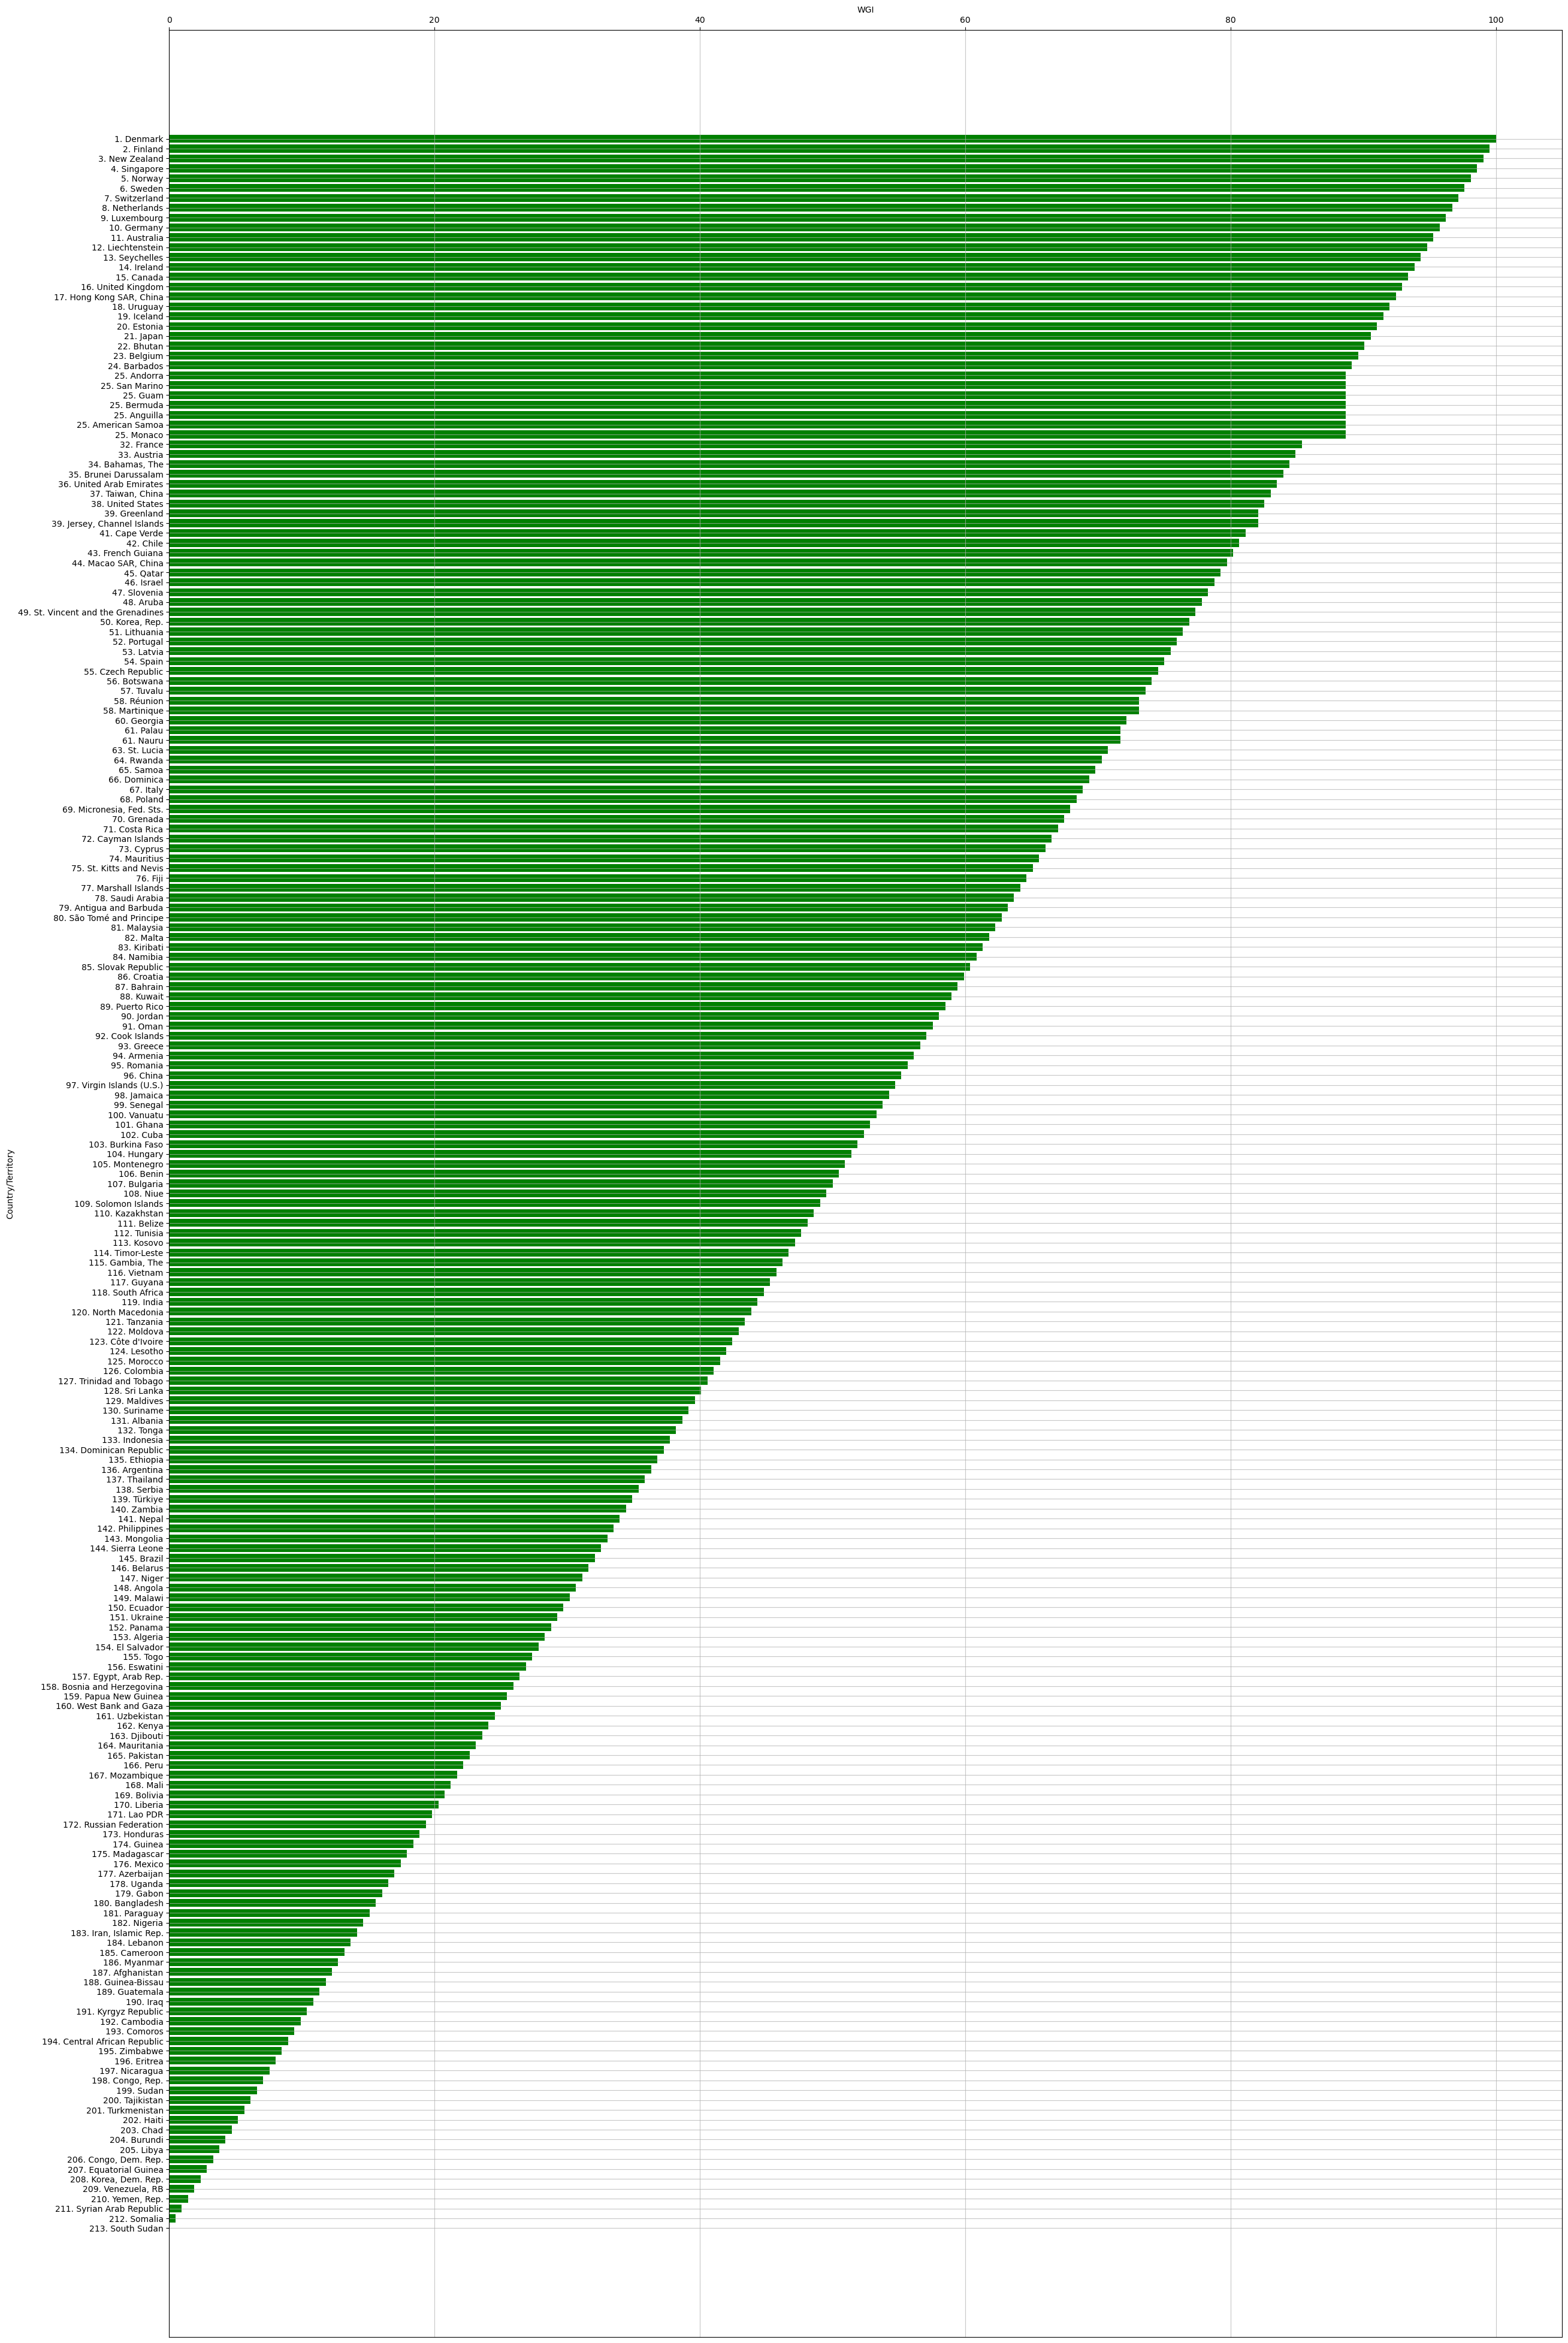

In [6]:
df_sorted_by_wgi = df_2022.sort_values('Rank.23', ascending=True)

if df_sorted_by_wgi['Rank.23'].isnull().any():
    print("Найдены NaN значения в 'Rank.23'.")
    # удаление NaN
    df_sorted_by_wgi = df_sorted_by_wgi.dropna(subset=['Rank.23'])

# присвоение порядковых номеров
df_sorted_by_wgi['Num'] = df_sorted_by_wgi['Rank.23'].rank(method='min', ascending=False).astype(int)

# формирование названия
df_sorted_by_wgi['Name'] = df_sorted_by_wgi['Num'].astype(str) + '. ' + df_sorted_by_wgi['Country/Territory']

# построение графика
plt.figure(figsize=(30, 50))  # размер графика
plt.barh(df_sorted_by_wgi['Name'], df_sorted_by_wgi['Rank.23'], color='green')


# вывод числовых значений справа от bar'a
# for index, value in enumerate(df_sorted_by_wgi['Rank.23']):
#     plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.grid(axis='y', linestyle='-', alpha=0.7)
    
plt.xlabel('WGI')
plt.ylabel('Country/Territory')
plt.show()

**4. Получение списка стран входящего в регион Europe and Central Asia из датасета regions**

In [7]:
df_by_region = pd.read_excel('regions.xlsx')
df_by_region_ECA = df_by_region.loc[df_by_region['Region']=='ECA']

df_by_region_ECA

,Country,Code,Region
1,Albania,ALB,ECA
5,Armenia,ARM,ECA
8,Azerbaijan,AZE,ECA
13,Belarus,BLR,ECA
18,Bosnia and Herzegovina,BIH,ECA
59,Georgia,GEO,ECA
83,Kazakhstan,KAZ,ECA
87,Kosovo,KSV,ECA
89,Kyrgyzstan,KGZ,ECA
107,Moldova,MDA,ECA


**5. Получекние стран из WGI входящих в указанный регион**

In [8]:
df_sorted_by_ECA_by_name = df[df['Country/Territory'].isin(df_by_region_ECA['Country'])]
df_sorted_by_ECA_by_name

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
5,Albania,ALB,-0.893903,0.315914,3.0,19.354839,2.688172,43.010754,-0.992025,0.233192,...,9.0,31.904762,21.428572,45.238094,-0.407876,0.158030,9.0,38.679245,26.886793,50.000000
9,Armenia,ARM,-0.473051,0.340507,2.0,38.172043,15.053763,59.139786,-0.936306,0.233192,...,8.0,57.619049,48.095238,62.857143,0.028035,0.175907,8.0,56.132076,47.169811,63.207546
14,Azerbaijan,AZE,-1.445619,0.275614,3.0,2.688172,0.000000,17.204302,-1.289568,0.191027,...,7.0,21.428572,12.857142,33.333332,-1.040572,0.185452,6.0,16.981133,7.075472,24.528301
23,Bosnia and Herzegovina,BIH,-0.270570,0.275614,3.0,48.924732,28.494623,60.752689,-0.402136,0.194088,...,8.0,28.095238,18.571428,41.428570,-0.683835,0.171805,8.0,25.943396,19.811321,39.150944
24,Belarus,BLR,-0.389609,0.340507,2.0,42.473118,17.741936,60.752689,-0.323170,0.233192,...,8.0,47.619049,33.333332,55.238094,-0.579676,0.164842,7.0,31.603773,21.226416,44.811321
69,Georgia,GEO,-1.527264,0.340507,2.0,1.075269,0.000000,17.741936,-0.982506,0.238827,...,8.0,74.285713,63.809525,80.476189,0.620238,0.171805,8.0,72.169815,63.207546,79.716980
98,Kazakhstan,KAZ,-1.132820,0.275614,3.0,12.365591,0.537634,30.107527,-1.078855,0.191027,...,10.0,47.142857,33.809525,54.285713,-0.185301,0.151206,10.0,48.584908,37.735847,57.547169
117,Kosovo,KSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,43.809525,29.523809,50.952381,-0.263795,0.162349,9.0,47.169811,33.962265,54.716980
121,Moldova,MDA,-0.437427,0.275614,3.0,39.784946,19.354839,57.526882,-0.399806,0.191027,...,9.0,35.238094,26.190475,48.095238,-0.341932,0.163362,8.0,42.924530,30.188679,51.886791
126,North Macedonia,MKD,-0.613846,0.275614,3.0,32.258064,14.516129,51.075268,-0.636420,0.194088,...,8.0,41.904762,28.095238,50.000000,-0.323431,0.171805,8.0,43.867924,30.188679,52.830189


In [9]:
# или так
df_sorted_by_ECA = df[df['Code'].isin(df_by_region_ECA['Code'])]
df_sorted_by_ECA

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
5,Albania,ALB,-0.893903,0.315914,3.0,19.354839,2.688172,43.010754,-0.992025,0.233192,...,9.0,31.904762,21.428572,45.238094,-0.407876,0.158030,9.0,38.679245,26.886793,50.000000
9,Armenia,ARM,-0.473051,0.340507,2.0,38.172043,15.053763,59.139786,-0.936306,0.233192,...,8.0,57.619049,48.095238,62.857143,0.028035,0.175907,8.0,56.132076,47.169811,63.207546
14,Azerbaijan,AZE,-1.445619,0.275614,3.0,2.688172,0.000000,17.204302,-1.289568,0.191027,...,7.0,21.428572,12.857142,33.333332,-1.040572,0.185452,6.0,16.981133,7.075472,24.528301
23,Bosnia and Herzegovina,BIH,-0.270570,0.275614,3.0,48.924732,28.494623,60.752689,-0.402136,0.194088,...,8.0,28.095238,18.571428,41.428570,-0.683835,0.171805,8.0,25.943396,19.811321,39.150944
24,Belarus,BLR,-0.389609,0.340507,2.0,42.473118,17.741936,60.752689,-0.323170,0.233192,...,8.0,47.619049,33.333332,55.238094,-0.579676,0.164842,7.0,31.603773,21.226416,44.811321
69,Georgia,GEO,-1.527264,0.340507,2.0,1.075269,0.000000,17.741936,-0.982506,0.238827,...,8.0,74.285713,63.809525,80.476189,0.620238,0.171805,8.0,72.169815,63.207546,79.716980
98,Kazakhstan,KAZ,-1.132820,0.275614,3.0,12.365591,0.537634,30.107527,-1.078855,0.191027,...,10.0,47.142857,33.809525,54.285713,-0.185301,0.151206,10.0,48.584908,37.735847,57.547169
100,Kyrgyz Republic,KGZ,-0.993923,0.340507,2.0,17.204302,0.537634,39.784946,-1.058797,0.238827,...,11.0,12.857142,5.714286,19.523809,-1.230029,0.155666,11.0,10.377358,4.716981,19.339622
117,Kosovo,KSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,43.809525,29.523809,50.952381,-0.263795,0.162349,9.0,47.169811,33.962265,54.716980
121,Moldova,MDA,-0.437427,0.275614,3.0,39.784946,19.354839,57.526882,-0.399806,0.191027,...,9.0,35.238094,26.190475,48.095238,-0.341932,0.163362,8.0,42.924530,30.188679,51.886791


Получение WGI содержащего estimate по годам для заданного региона

In [13]:
columns = {
'Estimate' : '1996',
'Estimate.1' : '1998',
'Estimate.2' : '2000',
'Estimate.3' : '2002',
'Estimate.4' : '2003',
'Estimate.5' : '2004',
'Estimate.6' : '2005',
'Estimate.7' : '2006',
'Estimate.8' : '2007',
'Estimate.9' : '2008',
'Estimate.10' : '2009',
'Estimate.11' : '2010',
'Estimate.12' : '2011',
'Estimate.13' : '2012',
'Estimate.14' : '2013',
'Estimate.15' : '2014',
'Estimate.16' : '2015',
'Estimate.17' : '2016',
'Estimate.18' : '2017',
'Estimate.19' : '2018',
'Estimate.20' : '2019',
'Estimate.21' : '2020',
'Estimate.22' : '2021',
'Estimate.23' : '2022',
}

df_sorted_by_ECA_wgi = df_sorted_by_ECA.filter(like='Estimate')
df_sorted_by_ECA_countries = df_sorted_by_ECA['Country/Territory']
df_sorted_by_ECA_wgi_estimate = df_sorted_by_ECA_wgi
df_sorted_by_ECA_wgi_estimate = pd.concat([df_sorted_by_ECA_countries,df_sorted_by_ECA_wgi_estimate],axis =1)
df_sorted_by_ECA_wgi_estimate_output = df_sorted_by_ECA_wgi_estimate.rename(columns = {
'Estimate' : '1996',
'Estimate.1' : '1998',
'Estimate.2' : '2000',
'Estimate.3' : '2002',
'Estimate.4' : '2003',
'Estimate.5' : '2004',
'Estimate.6' : '2005',
'Estimate.7' : '2006',
'Estimate.8' : '2007',
'Estimate.9' : '2008',
'Estimate.10' : '2009',
'Estimate.11' : '2010',
'Estimate.12' : '2011',
'Estimate.13' : '2012',
'Estimate.14' : '2013',
'Estimate.15' : '2014',
'Estimate.16' : '2015',
'Estimate.17' : '2016',
'Estimate.18' : '2017',
'Estimate.19' : '2018',
'Estimate.20' : '2019',
'Estimate.21' : '2020',
'Estimate.22' : '2021',
'Estimate.23' : '2022',
})
df_sorted_by_ECA_wgi_estimate_output

,Country/Territory,1996,1998,2000,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,Albania,-0.893903,-0.992025,-0.855564,-0.845341,-0.853787,-0.723732,-0.813264,-0.790545,-0.706940,...,-0.750956,-0.586141,-0.544385,-0.471469,-0.480891,-0.545840,-0.563900,-0.572924,-0.576536,-0.407876
9,Armenia,-0.473051,-0.936306,-0.848086,-0.778165,-0.649022,-0.703455,-0.683350,-0.669233,-0.745892,...,-0.530450,-0.565155,-0.609267,-0.659124,-0.636488,-0.408891,-0.226975,-0.003439,0.048978,0.028035
14,Azerbaijan,-1.445619,-1.289568,-1.292383,-1.195502,-1.046232,-1.180832,-1.052521,-1.095912,-1.129074,...,-0.970375,-1.022490,-0.952502,-0.852654,-0.906025,-0.852769,-0.849424,-1.077084,-0.847372,-1.040572
23,Bosnia and Herzegovina,-0.270570,-0.402136,-0.595849,-0.387543,-0.282097,-0.324706,-0.232809,-0.301414,-0.374117,...,-0.244403,-0.299685,-0.417168,-0.485801,-0.553566,-0.605827,-0.646843,-0.642687,-0.665344,-0.683835
24,Belarus,-0.389609,-0.323170,-0.504358,-0.657885,-0.537340,-0.759293,-0.723231,-0.529869,-0.574206,...,-0.404938,-0.234707,-0.315780,-0.224087,-0.240941,-0.154802,0.007286,-0.133964,-0.258150,-0.579676
69,Georgia,-1.527264,-0.982506,-1.040173,-1.264142,-0.650767,-0.459568,-0.212854,0.050152,-0.128835,...,0.463925,0.828558,0.700716,0.712997,0.758942,0.724707,0.716376,0.600856,0.661190,0.620238
98,Kazakhstan,-1.132820,-1.078855,-1.149889,-1.113585,-1.026524,-1.105954,-1.014963,-0.995143,-0.992245,...,-0.930915,-0.825429,-0.871415,-0.831907,-0.839266,-0.492077,-0.285695,-0.377907,-0.259160,-0.185301
100,Kyrgyz Republic,-0.993923,-1.058797,-1.007479,-1.064770,-1.032819,-1.097712,-1.267269,-1.325560,-1.329098,...,-1.161999,-1.129372,-1.178612,-1.104307,-1.078474,-0.960398,-0.959892,-1.124470,-1.149719,-1.230029
117,Kosovo,NaN,NaN,0.371275,0.360482,-0.504248,-0.305081,-0.526772,-0.514050,-0.735241,...,-0.649519,-0.486074,-0.559606,-0.437756,-0.527442,-0.527982,-0.541139,-0.463044,-0.341269,-0.263795
121,Moldova,-0.437427,-0.399806,-0.623196,-0.980350,-0.884173,-1.039576,-0.672626,-0.643212,-0.660765,...,-0.752407,-0.852724,-0.936965,-0.976332,-0.823586,-0.746429,-0.644489,-0.571010,-0.468919,-0.341932


**6. Построение графика индекса WGI за 1996-2022 для Europe and Central Asia**

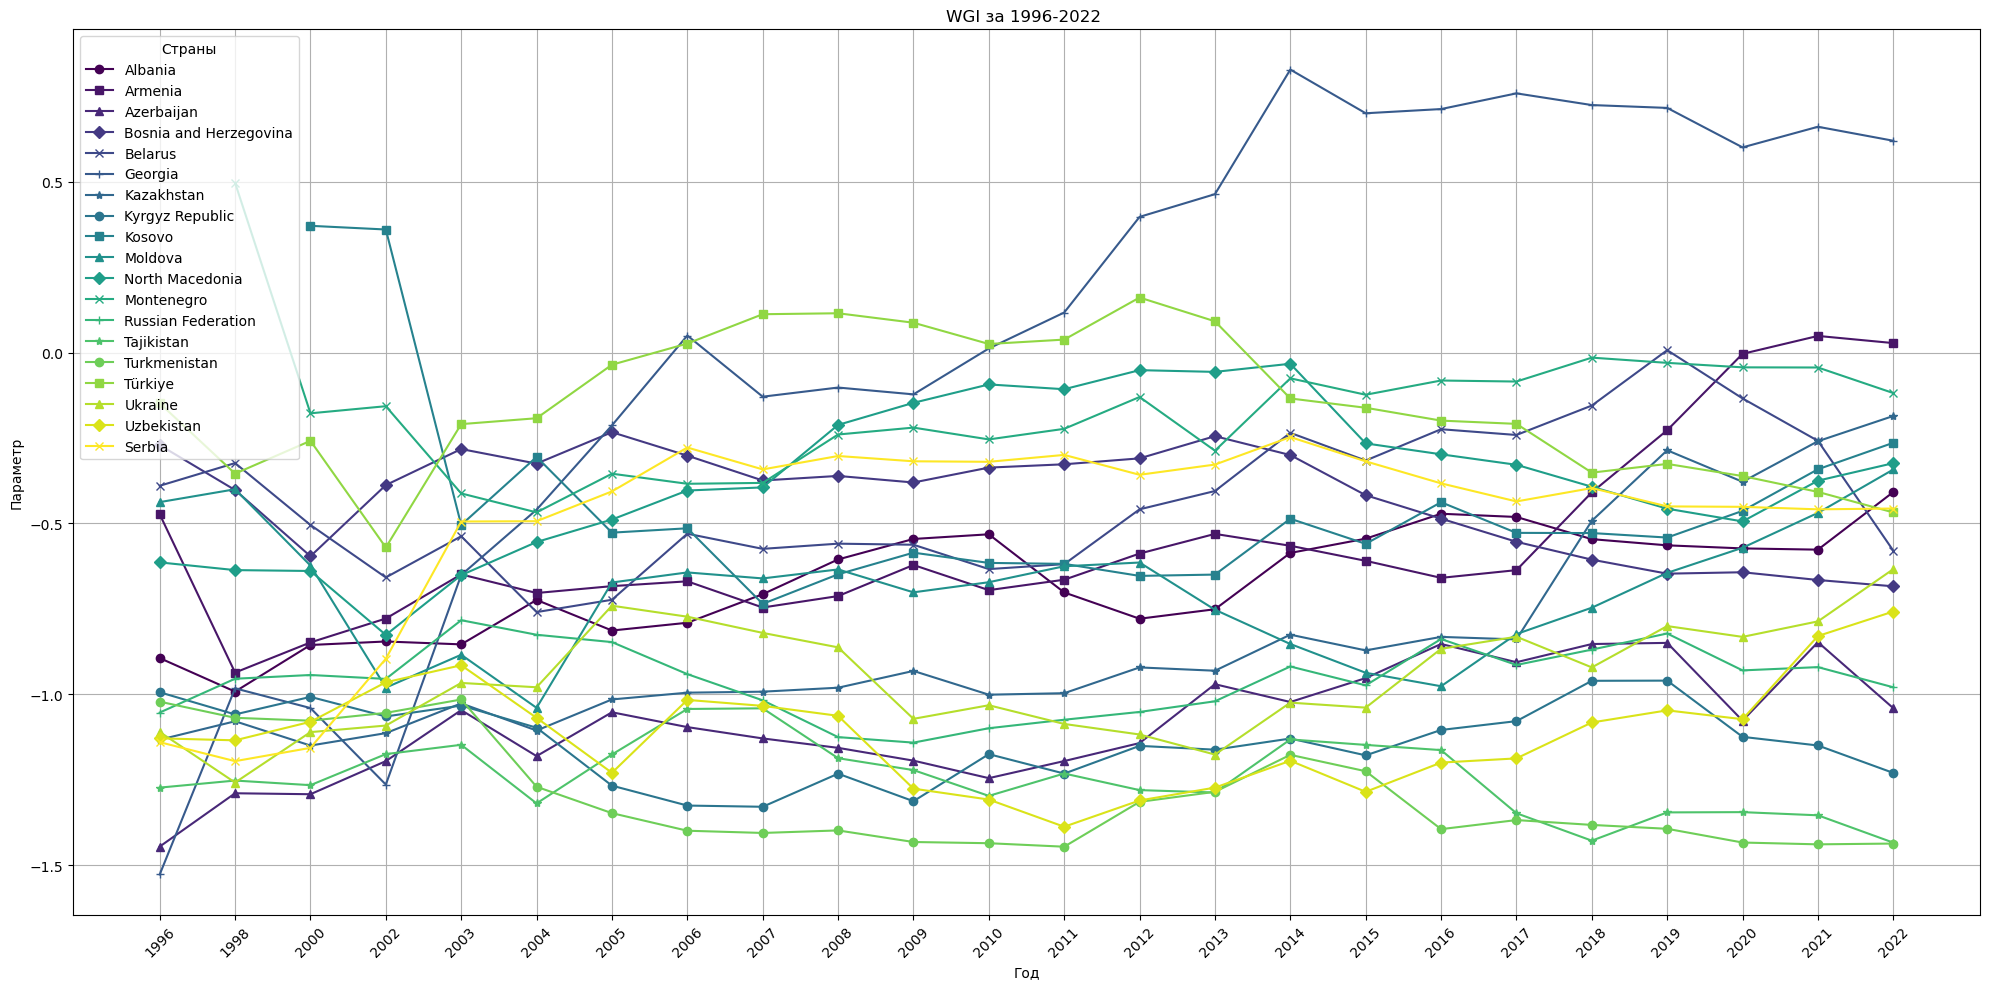

In [11]:
# df_sorted_by_ECA_wgi = df_sorted_by_ECA_wgi
# df_sorted_by_ECA_wgi
# plt.figure(figsize=(30, 50))
# plt.title(" WGI за 1996-2022 для региона ECA")
# plt.plot(df_sorted_by_ECA_wgi_estimate['Country/Territory'],
#         df_sorted_by_ECA_wgi)


# установим индекс для DataFrame
df_sorted_by_ECA_wgi_estimate_output_T = df_sorted_by_ECA_wgi_estimate_output.set_index('Country/Territory', inplace=True)

df_sorted_by_ECA_wgi_estimate_output_T = df_sorted_by_ECA_wgi_estimate_output.T


plt.figure(figsize=(20, 10))

markers = ['o', 's', '^', 'D', 'x', '+', '*']

# генерация уникальных цветов
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted_by_ECA_wgi_estimate_output_T.columns)))

for i, country in enumerate(df_sorted_by_ECA_wgi_estimate_output_T.columns):
    marker = markers[i % len(markers)]  # используем маркер по кругу
    plt.plot(df_sorted_by_ECA_wgi_estimate_output_T.index,
             df_sorted_by_ECA_wgi_estimate_output_T[country],
             marker=marker, color=colors[i], label=country)

plt.title("WGI за 1996-2022 ")
plt.xlabel('Год')
plt.ylabel('Параметр')
plt.xticks(rotation=45)  # поворачиваем метки по оси X для удобства чтения
plt.legend(title='Страны')
plt.grid()
plt.tight_layout()

plt.show()

**7. Получение стран с наибольшим и наименьшим значением WGI в регионе Europe and Central Asia**

In [15]:
# надо перезапустить In [10] иначе не работает
df_sorted_by_ECA_wgi_estimate_output_2022 = df_sorted_by_ECA_wgi_estimate_output[['Country/Territory','2022']]
df_sorted_by_ECA_wgi_estimate_output_2022
max_2022 = df_sorted_by_ECA_wgi_estimate_output_2022['2022'].max()
maxes = df_sorted_by_ECA_wgi_estimate_output_2022[df_sorted_by_ECA_wgi_estimate_output_2022['2022'] == max_2022]
print("Страны с наибольшим индексом WGI за 2022 год:")
maxes

Страны с наибольшим индексом WGI за 2022 год:


,Country/Territory,2022
69,Georgia,0.620238


In [16]:
min_2022 = df_sorted_by_ECA_wgi_estimate_output_2022['2022'].min()
mins = df_sorted_by_ECA_wgi_estimate_output_2022[df_sorted_by_ECA_wgi_estimate_output_2022['2022'] == min_2022]
print("\nСтраны с наименьшим индексом WGI за 2022 год:")
mins


Страны с наименьшим индексом WGI за 2022 год:


,Country/Territory,2022
187,Turkmenistan,-1.436774


**8. Определение среднего значения за каждый год в период с 1996 по 2022 в регионе Europe and Central Asia**

In [17]:
means = df_sorted_by_ECA_wgi_estimate_output.drop(columns = ['Country/Territory'])
means = df_sorted_by_ECA_wgi_estimate_output.mean(numeric_only=True)
means

1996   -0.885471
1998   -0.823362
2000   -0.802862
2002   -0.821879
2003   -0.740051
2004   -0.782648
2005   -0.727624
2006   -0.685522
2007   -0.721019
2008   -0.698221
2009   -0.720827
2010   -0.721366
2011   -0.719957
2012   -0.666920
2013   -0.660700
2014   -0.584655
2015   -0.643372
2016   -0.618599
2017   -0.633326
2018   -0.600420
2019   -0.561316
2020   -0.596217
2021   -0.551040
2022   -0.562725
dtype: float64

**9. Построение графика индекса WGI за 1996-2022 для стран региона Europe and Central Asia с выделением страны с наибольшим и наименьшим значением WGI за 2022 год, а также отображение среднего значения по региону и РФ**

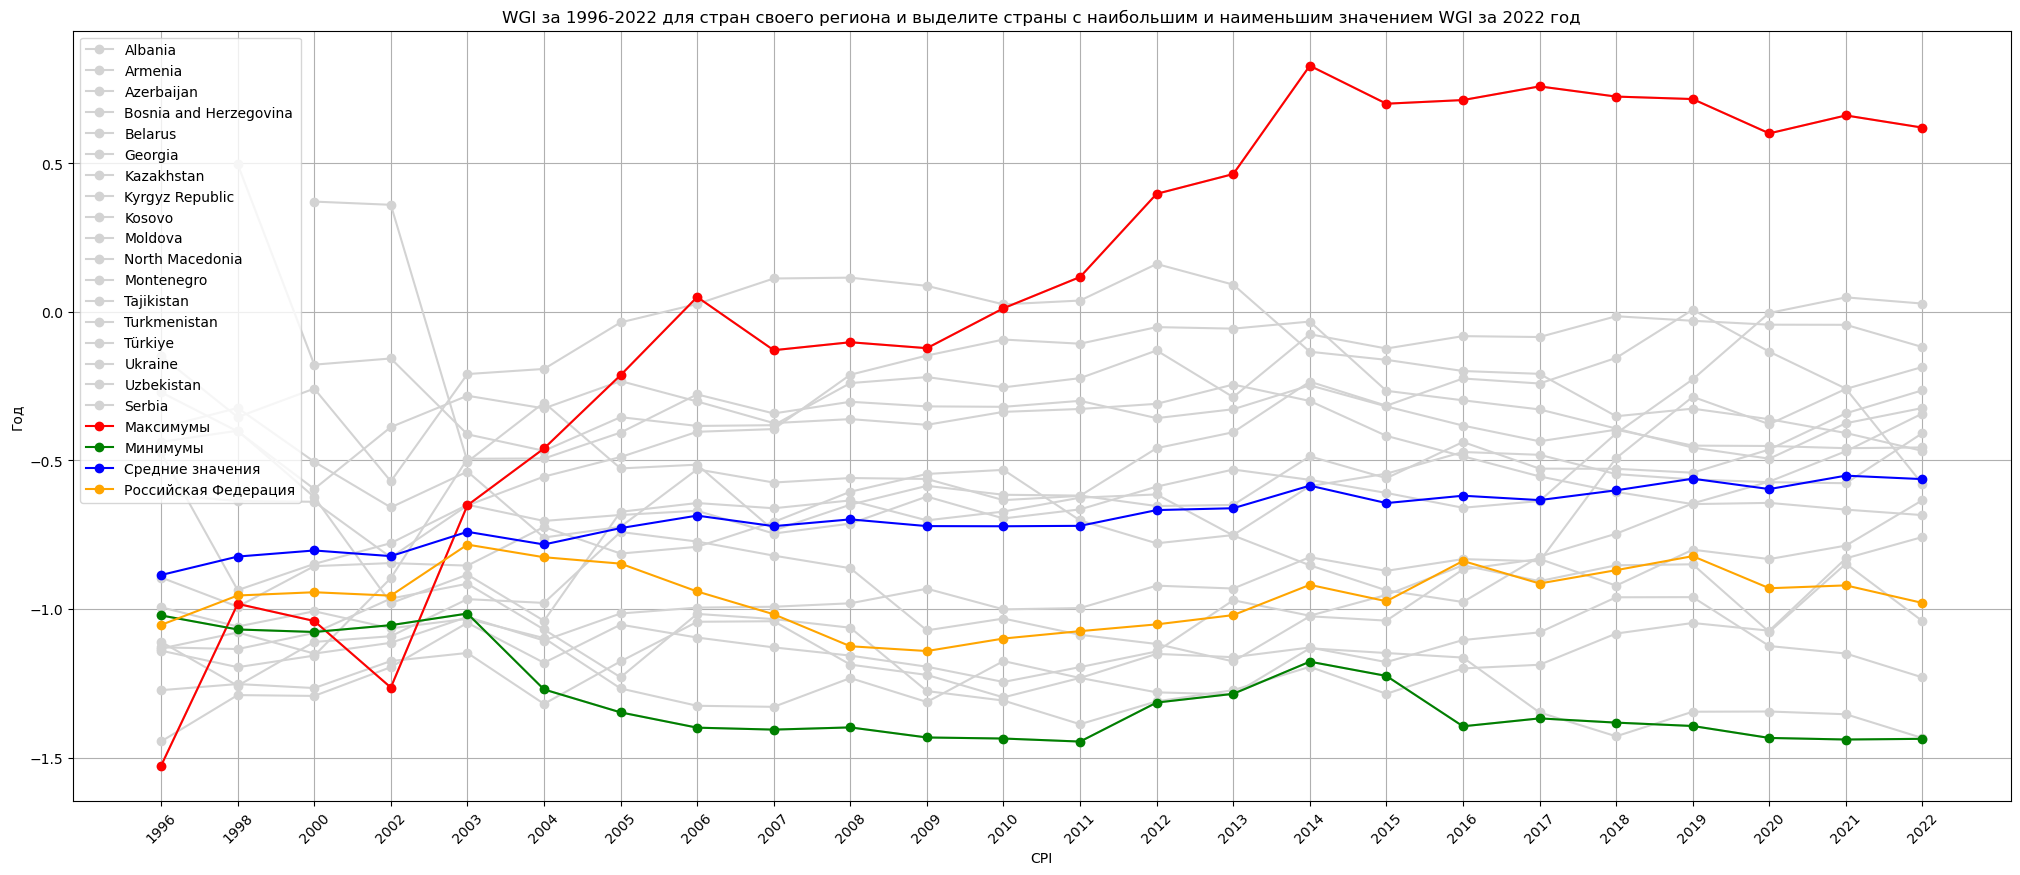

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
task1_9 = df_sorted_by_ECA_wgi_estimate_output_T
task1_9 = task1_9.drop(columns=['Russian Federation'])

# строим основной график
task1_9.plot(ax=ax, color='lightgrey', marker='o', legend=False, title="WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год")

# добавляем максимумы, минимумы и средние значения
ax.plot(df_sorted_by_ECA_wgi_estimate_output_T[maxes['Country/Territory']], color='red', marker='o', label='Максимумы')
ax.plot(df_sorted_by_ECA_wgi_estimate_output_T[mins['Country/Territory']], color='green', marker='o', label='Минимумы')
ax.plot(means, color='blue', marker='o', label='Средние значения')

# добавляем линию для "Russian Federation"
ax.plot(df_sorted_by_ECA_wgi_estimate_output_T['Russian Federation'], color='orange', marker='o', label='Российская Федерация')

ax.set_xticks(df_sorted_by_ECA_wgi_estimate_output_T.index)  # Установка всех годов как меток на оси X
ax.set_xticklabels(df_sorted_by_ECA_wgi_estimate_output_T.index, rotation=45)  # Подписи под углом для читаемости


ax.set_xlabel("CPI")
ax.set_ylabel("Год")

ax.legend()
ax.grid()  # Сетка по каждому году на оси X
plt.show()

**11. Определение изменения rank с 1996 по 2022 в регионе Americas**

In [19]:
df_by_region_AME = df_by_region.loc[df_by_region['Region']=='AME']

df_by_region_AME

,Country,Code,Region
4,Argentina,ARG,AME
9,Bahamas,BHS,AME
12,Barbados,BRB,AME
17,Bolivia,BOL,AME
20,Brazil,BRA,AME
27,Canada,CAN,AME
30,Chile,CHL,AME
32,Colombia,COL,AME
35,Costa Rica,CRI,AME
38,Cuba,CUB,AME


In [20]:
df_sorted_by_AME = df[df['Code'].isin(df_by_region_AME['Code'])]
df_sorted_by_AME

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
8,Argentina,ARG,-0.101317,0.210325,6.0,53.763439,38.709679,62.903225,-0.203482,0.188628,...,12.0,38.095238,27.619047,49.523811,-0.447030,0.158160,11.0,36.320755,24.528301,48.113209
22,"Bahamas, The",BHS,1.156810,0.418145,2.0,83.870964,69.892471,93.010750,1.295374,0.417848,...,5.0,83.809525,79.047623,89.523811,1.256190,0.204875,4.0,84.433960,79.716980,91.509438
27,Bolivia,BOL,-0.824829,0.262077,4.0,25.268818,6.451613,41.935482,-0.442392,0.227055,...,11.0,20.476191,12.857142,29.523809,-0.889223,0.158930,11.0,20.754717,12.735849,29.716982
28,Brazil,BRA,-0.018580,0.210325,6.0,56.989246,44.086021,63.440861,0.041475,0.188628,...,12.0,34.285713,25.238094,48.095238,-0.566063,0.158160,11.0,32.075470,21.698112,44.811321
29,Barbados,BRB,1.542726,0.340507,2.0,90.860214,81.182793,96.774193,1.541047,0.324013,...,6.0,84.761902,80.000000,90.952377,1.284573,0.208671,5.0,89.150940,80.188683,92.924530
35,Canada,CAN,2.031408,0.210325,6.0,96.236557,91.397850,100.000000,2.034210,0.188628,...,9.0,92.380951,89.047623,96.190475,1.658580,0.169171,9.0,93.396225,89.150940,96.698112
37,Chile,CHL,1.454119,0.210325,6.0,90.322578,81.182793,93.010750,1.297507,0.188628,...,12.0,80.952377,75.238098,85.238098,0.968280,0.158160,11.0,80.660378,75.471695,83.962265
43,Colombia,COL,-0.512254,0.210325,6.0,36.559139,23.118280,50.537636,-0.523702,0.188628,...,12.0,42.380951,29.523809,50.000000,-0.361808,0.158160,11.0,41.037735,29.716982,51.415092
46,Costa Rica,CRI,0.696142,0.244907,5.0,75.268814,63.440861,81.182793,0.756039,0.227055,...,11.0,66.666664,59.523811,77.142860,0.465849,0.166021,10.0,66.981133,59.905659,75.943398
47,Cuba,CUB,0.289153,0.262077,4.0,63.440861,52.150539,75.806450,0.344617,0.227055,...,5.0,54.285713,41.428570,62.857143,-0.069347,0.205471,5.0,52.358490,38.679245,62.264153


In [21]:
df_sorted_by_AME_rank = df_sorted_by_AME.filter(like='Rank')

df_sorted_by_AME_countries = df_sorted_by_AME['Country/Territory']
# df_sorted_by_AME_countries


df_sorted_by_AME_rank = pd.concat([df_sorted_by_AME_countries,df_sorted_by_AME_rank],axis =1)
df_sorted_by_AME_rank
df_sorted_by_AME_rank_output = df_sorted_by_AME_rank.rename(columns = {
'Rank' : '1996',
'Rank.1' : '1998',
'Rank.2' : '2000',
'Rank.3' : '2002',
'Rank.4' : '2003',
'Rank.5' : '2004',
'Rank.6' : '2005',
'Rank.7' : '2006',
'Rank.8' : '2007',
'Rank.9' : '2008',
'Rank.10' : '2009',
'Rank.11' : '2010',
'Rank.12' : '2011',
'Rank.13' : '2012',
'Rank.14' : '2013',
'Rank.15' : '2014',
'Rank.16' : '2015',
'Rank.17' : '2016',
'Rank.18' : '2017',
'Rank.19' : '2018',
'Rank.20' : '2019',
'Rank.21' : '2020',
'Rank.22' : '2021',
'Rank.23' : '2022',
})
df_sorted_by_AME_rank_output

,Country/Territory,1996,1998,2000,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
8,Argentina,53.763439,50.267380,52.127659,41.798943,40.211639,39.901478,43.414635,43.414635,44.174759,...,40.758293,35.576923,33.809525,45.714287,44.285713,53.809525,52.857143,47.619049,38.095238,36.320755
22,"Bahamas, The",83.870964,85.561501,86.170212,89.417992,89.947090,91.625618,89.268295,90.243904,89.320389,...,88.625595,88.942307,81.904762,80.952377,82.857140,82.380951,82.380951,82.857140,83.809525,84.433960
27,Bolivia,25.268818,40.641712,40.425533,22.222221,23.280424,24.630543,24.390244,39.512196,39.805824,...,35.071091,30.288462,26.666666,24.285715,26.666666,27.619047,25.714285,22.380953,20.476191,20.754717
28,Brazil,56.989246,56.149734,57.978722,58.730160,59.788361,54.679802,51.707317,53.170731,54.854370,...,54.976303,44.230770,40.952381,39.523811,35.714287,38.095238,40.000000,37.619049,34.285713,32.075470
29,Barbados,90.860214,90.909088,90.957443,91.005295,91.005295,91.133003,90.731705,89.756096,91.262138,...,91.469193,82.692307,90.000000,87.619049,89.047623,88.571426,83.333336,84.761902,84.761902,89.150940
35,Canada,96.236557,95.187164,95.212769,94.179893,94.179893,92.118225,93.658539,95.609756,95.145630,...,95.260666,94.711540,95.238098,96.190475,95.714287,93.809525,92.857140,91.904762,92.380951,93.396225
37,Chile,90.322578,86.096260,91.489365,90.476189,83.597885,87.684731,91.219513,91.219513,89.805824,...,90.047394,90.384613,87.142860,80.476189,81.428574,80.952377,80.476189,83.333336,80.952377,80.660378
43,Colombia,36.559139,36.363636,42.553192,46.560848,50.793652,52.216747,52.195122,52.195122,49.029125,...,40.284359,42.788460,44.761906,41.904762,42.380951,43.333332,46.190475,45.714287,42.380951,41.037735
46,Costa Rica,75.268814,77.005348,74.468086,70.370369,72.486771,63.054188,65.365852,70.243904,71.844658,...,70.616112,75.000000,74.285713,73.333336,64.285713,67.142860,71.904762,74.285713,66.666664,66.981133
47,Cuba,63.440861,64.171120,65.957443,69.312172,62.433861,60.591133,62.926830,62.926830,65.048546,...,61.611374,59.134617,58.095238,60.000000,62.380951,59.047619,57.142857,48.571430,54.285713,52.358490


In [22]:
df_sorted_by_AME_wgi_estimate_output_2022 = df_sorted_by_AME_rank_output[['Country/Territory','2022']]
df_sorted_by_AME_wgi_estimate_output_2022
AME_max_2022 = df_sorted_by_AME_rank_output['2022'].max()
AME_maxes = df_sorted_by_AME_wgi_estimate_output_2022[df_sorted_by_AME_wgi_estimate_output_2022['2022'] == AME_max_2022]
print("Страны с наибольшим индексом WGI за 2022 год:")
country_with_max_value = AME_maxes['Country/Territory'].values[0]
AME_maxes

Страны с наибольшим индексом WGI за 2022 год:


,Country/Territory,2022
35,Canada,93.396225


In [23]:
AME_min_2022 = df_sorted_by_AME_rank_output['2022'].min()
AME_mins = df_sorted_by_AME_wgi_estimate_output_2022[df_sorted_by_AME_wgi_estimate_output_2022['2022'] == AME_min_2022]
print("Страны с наименьшим индексом WGI за 2022 год:")
country_with_min_value = AME_mins['Country/Territory'].values[0]
AME_mins

Страны с наименьшим индексом WGI за 2022 год:


,Country/Territory,2022
202,"Venezuela, RB",1.886792


In [24]:
AME_means = df_sorted_by_AME_rank_output.drop(columns =['Country/Territory'])
AME_means = df_sorted_by_AME_rank_output.mean(numeric_only=True)
AME_means

1996    53.279570
1998    52.655972
2000    53.581560
2002    51.587302
2003    51.728395
2004    51.200739
2005    52.728659
2006    53.033536
2007    53.200849
2008    53.929005
2009    53.588517
2010    53.497023
2011    54.028437
2012    51.836493
2013    51.747630
2014    48.332332
2015    48.660715
2016    48.854167
2017    48.229167
2018    47.961309
2019    48.050595
2020    46.964286
2021    45.982143
2022    45.592570
dtype: float64

In [25]:
# df_sorted_by_AME = df[df['Code'].isin(df_by_region_AME['Code'])]
# df_by_region
data = {'Country': df_sorted_by_AME_rank_output['Country/Territory'],
        '1996': df_sorted_by_AME_rank_output['1996'],
        '2022': df_sorted_by_AME_rank_output['2022'],
        'Rank_Difference': df_sorted_by_AME_rank_output['2022'] - df_sorted_by_AME_rank_output['1996'] }
rank_diff = pd.DataFrame(data)
rank_diff

,Country,1996,2022,Rank_Difference
8,Argentina,53.763439,36.320755,-17.442684
22,"Bahamas, The",83.870964,84.433960,0.562996
27,Bolivia,25.268818,20.754717,-4.514101
28,Brazil,56.989246,32.075470,-24.913776
29,Barbados,90.860214,89.150940,-1.709274
35,Canada,96.236557,93.396225,-2.840332
37,Chile,90.322578,80.660378,-9.662201
43,Colombia,36.559139,41.037735,4.478596
46,Costa Rica,75.268814,66.981133,-8.287682
47,Cuba,63.440861,52.358490,-11.082371


In [26]:
russ_data = df.loc[df['Country/Territory'] == 'Russian Federation']
russ_data = russ_data[['Country/Territory', 'Rank', 'Rank.23']]

russ_data.rename(columns={'Country/Territory': 'Country',
                         'Rank': '1996',
                         'Rank.23': '2022'}, inplace=True)

russ_data['Rank_Difference'] = russ_data['2022'] - russ_data['1996']



russ_data
# rank_diff = pd.merge(rank_diff,df_by_region, on='Country', how='left')
# rank_diff

,Country,1996,2022,Rank_Difference
163,Russian Federation,15.053763,19.339622,4.285859


In [27]:
rank_diff_and_rus =  pd.concat([rank_diff, russ_data], ignore_index=True)
rank_diff_and_rus

,Country,1996,2022,Rank_Difference
0,Argentina,53.763439,36.320755,-17.442684
1,"Bahamas, The",83.870964,84.433960,0.562996
2,Bolivia,25.268818,20.754717,-4.514101
3,Brazil,56.989246,32.075470,-24.913776
4,Barbados,90.860214,89.150940,-1.709274
5,Canada,96.236557,93.396225,-2.840332
6,Chile,90.322578,80.660378,-9.662201
7,Colombia,36.559139,41.037735,4.478596
8,Costa Rica,75.268814,66.981133,-8.287682
9,Cuba,63.440861,52.358490,-11.082371


In [28]:
# rank_diff = pd.merge(rank_diff_and_rus,df_by_region, on='Country', how='left')
# rank_diff
codes_df = df[['Country/Territory', 'Code']]
codes_df.columns = ['Country', 'Code']  # Переименуйте столбцы для соответствия
codes_df


,Country,Code
0,Aruba,ABW
1,Andorra,ADO
2,Afghanistan,AFG
3,Angola,AGO
4,Anguilla,AIA
...,...,...
209,Serbia,SRB
210,South Africa,ZAF
211,"Congo, Dem. Rep.",ZAR
212,Zambia,ZMB


In [29]:
rank_diff_and_rus = pd.merge(rank_diff_and_rus, codes_df, on='Country', how='left')
rank_diff_and_rus['Country'] = rank_diff_and_rus['Country'].replace('Russian Federation', 'Russia')
rank_diff_and_rus

,Country,1996,2022,Rank_Difference,Code
0,Argentina,53.763439,36.320755,-17.442684,ARG
1,"Bahamas, The",83.870964,84.433960,0.562996,BHS
2,Bolivia,25.268818,20.754717,-4.514101,BOL
3,Brazil,56.989246,32.075470,-24.913776,BRA
4,Barbados,90.860214,89.150940,-1.709274,BRB
5,Canada,96.236557,93.396225,-2.840332,CAN
6,Chile,90.322578,80.660378,-9.662201,CHL
7,Colombia,36.559139,41.037735,4.478596,COL
8,Costa Rica,75.268814,66.981133,-8.287682,CRI
9,Cuba,63.440861,52.358490,-11.082371,CUB


In [30]:
rank_diff_and_rus = rank_diff_and_rus.merge(df_by_region[['Code', 'Region']], on='Code', how='left')
rank_diff_and_rus

,Country,1996,2022,Rank_Difference,Code,Region
0,Argentina,53.763439,36.320755,-17.442684,ARG,AME
1,"Bahamas, The",83.870964,84.433960,0.562996,BHS,AME
2,Bolivia,25.268818,20.754717,-4.514101,BOL,AME
3,Brazil,56.989246,32.075470,-24.913776,BRA,AME
4,Barbados,90.860214,89.150940,-1.709274,BRB,AME
5,Canada,96.236557,93.396225,-2.840332,CAN,AME
6,Chile,90.322578,80.660378,-9.662201,CHL,AME
7,Colombia,36.559139,41.037735,4.478596,COL,AME
8,Costa Rica,75.268814,66.981133,-8.287682,CRI,AME
9,Cuba,63.440861,52.358490,-11.082371,CUB,AME


**Составление таблицы для региона Americas и РФ (WGI - rank)**

In [31]:
result = pd.DataFrame({
    'Регион': ['-']*4,
    'Страна': ['-']*4,
    'WGI 1996': ['-']*4,
    'WGI 2022': ['-']*4,
    'Изменение (см. пункт 11)': ['-']*4
}, index=['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'])
result

,Регион,Страна,WGI 1996,WGI 2022,Изменение (см. пункт 11)
mean_2022,-,-,-,-,-
max_2022,-,-,-,-,-
min_2022,-,-,-,-,-
Russia_2022,-,-,-,-,-


In [32]:
AME_maxes.columns = ['Country', '2022'] 
AME_mins.columns = ['Country', '2022']  


AME_maxes
result.at['mean_2022', 'Регион'] = "AME"
result.at['mean_2022', 'WGI 1996'] = AME_means['1996']
result.at['mean_2022', 'WGI 2022'] = AME_means['2022']
result.at['mean_2022', 'Изменение (см. пункт 11)'] = AME_means['2022'] - AME_means['1996']

Max = rank_diff_and_rus[rank_diff_and_rus['Country'] == AME_maxes['Country'].values[0]]
result.at['max_2022', 'Регион'] = Max['Region'].values[0]
result.at['max_2022', 'Страна'] = Max['Country'].values[0]
result.at['max_2022', 'WGI 1996'] = Max['1996'].values[0]
result.at['max_2022', 'WGI 2022'] = Max['2022'].values[0]
result.at['max_2022', 'Изменение (см. пункт 11)'] = Max['Rank_Difference'].values[0]



Min = rank_diff_and_rus[rank_diff_and_rus['Country'] == AME_mins['Country'].values[0]]
result.at['min_2022', 'Регион'] = Min['Region'].values[0]
result.at['min_2022', 'Страна'] = Min['Country'].values[0]
result.at['min_2022', 'WGI 1996'] = Min['1996'].values[0]
result.at['min_2022', 'WGI 2022'] = Min['2022'].values[0]
result.at['min_2022', 'Изменение (см. пункт 11)'] = Min['Rank_Difference'].values[0]

russ = rank_diff_and_rus[rank_diff_and_rus['Country'] == "Russia"]
result.at['Russia_2022', 'Регион'] = russ['Region'].values[0]
result.at['Russia_2022', 'Страна'] = russ['Country'].values[0]
result.at['Russia_2022', 'WGI 1996'] = russ['1996'].values[0]
result.at['Russia_2022', 'WGI 2022'] = russ['2022'].values[0]
result.at['Russia_2022', 'Изменение (см. пункт 11)'] = russ['Rank_Difference'].values[0]
result

,Регион,Страна,WGI 1996,WGI 2022,Изменение (см. пункт 11)
mean_2022,AME,-,53.27957,45.59257,-7.686999
max_2022,AME,Canada,96.236557,93.396225,-2.840332
min_2022,AME,"Venezuela, RB",22.580645,1.886792,-20.693852
Russia_2022,ECA,Russia,15.053763,19.339622,4.285859


**12. Создание диаграммы размаха (boxplot) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (estimate)**

In [33]:
df_merged = pd.merge(df, df_by_region, on='Code', how='left')
df_merged = df_merged.rename(columns={'Estimate.23': 'WGI_2022'})
df_merged = df_merged[['Country', 'WGI_2022', 'Region']].dropna(subset=['WGI_2022', 'Region'])
df_merged

,Country,WGI_2022,Region
2,Afghanistan,-1.183776,AP
3,Angola,-0.601941,SSA
5,Albania,-0.407876,ECA
7,United Arab Emirates,1.155336,MENA
8,Argentina,-0.447030,AME
...,...,...,...
208,Yemen,-1.679558,MENA
209,Serbia,-0.456188,ECA
210,South Africa,-0.319765,SSA
212,Zambia,-0.529200,SSA


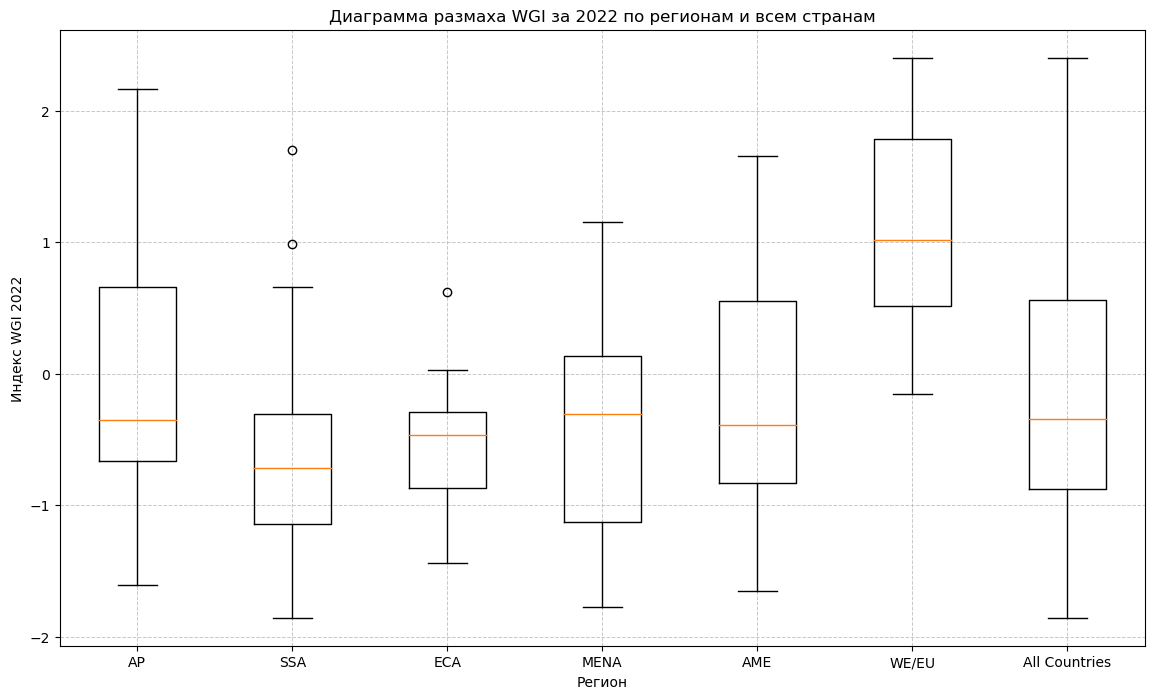

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


df_merged = pd.merge(df, df_by_region, on='Code', how='left')
df_merged = df_merged.rename(columns={'Estimate.23': 'WGI_2022'})

# удаление  NaN
df_merged = df_merged[['Country', 'WGI_2022', 'Region']].dropna(subset=['WGI_2022', 'Region'])

regions = df_merged['Region'].unique()

data = [df_merged[df_merged['Region'] == region]['WGI_2022'] for region in regions]

# данные для всех стран
data.append(df_merged['WGI_2022'])

# метки для диаграммы размаха
labels = list(regions) + ['All Countries']

plt.figure(figsize=(14, 8))

plt.boxplot(data, labels=labels)

plt.title('Диаграмма размаха WGI за 2022 по регионам и всем странам')
plt.xlabel('Регион')
plt.ylabel('Индекс WGI 2022')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

<h1>Задача 2. Анализ рынка акций</h1>

In [35]:
import os

**1. Загрузка данных в один dataframe из всех файлов в папке /data/stock.**

In [36]:
folder_path = 'stock'

combined_df = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_csv(file_path)

        stock_name = filename.replace('.csv', '')

        df = df[['Date', 'Close']]

        df.set_index('Date', inplace=True)

        df.rename(columns={'Close': stock_name}, inplace=True)

        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.join(df, how='outer')

combined_df

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300
2022-06-01,136.720001,89.080002,366.059998,106.209999,42.639999,20.990000,41.669998,108.962997,53.139999,32.779999,...,151.589996,69.870003,18.160000,NaN,93.830002,27.450001,224.473328,83.809998,20.459999,8.6300
2022-07-01,162.509995,110.980003,410.119995,134.949997,45.369999,22.740000,48.630001,116.320000,57.400002,33.389999,...,181.630005,77.839996,19.480000,NaN,113.019997,25.780001,297.149994,84.800003,23.450001,7.8900
2022-08-01,157.220001,113.120003,373.440002,126.769997,44.720001,21.389999,44.130001,108.220001,59.869999,28.709999,...,150.940002,74.150002,23.040001,NaN,108.150002,25.719999,275.609985,69.580002,28.760000,7.1900
2022-09-01,138.199997,105.040001,275.200012,113.000000,40.000000,20.719999,36.810001,95.650002,51.220001,24.920000,...,121.389999,61.070000,23.299999,NaN,86.300003,27.309999,265.250000,69.139999,26.500000,5.5800


**2. Получеине корряляционной матрицы для всех акций**

In [37]:
correlation_matrix = combined_df.corr()
correlation_matrix

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,...,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,...,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311
DBX,0.740429,0.332740,0.816359,0.478171,0.496982,1.000000,-0.157363,0.669228,0.402517,-0.177013,...,0.519374,0.667833,0.710191,0.424923,0.525305,0.423136,0.037233,-0.113102,0.595928,0.382992
EBAY,0.115591,0.644140,0.180354,0.434078,0.494938,-0.157363,1.000000,0.375794,0.251066,0.744560,...,0.087027,-0.070414,-0.002757,0.338672,0.296858,-0.149330,0.434899,0.753732,0.085736,0.535223
GOOGL,0.806847,0.780440,0.915440,0.912332,0.600025,0.669228,0.375794,1.000000,0.535473,0.263251,...,0.715287,0.618983,0.640675,0.824313,0.821587,0.322718,0.326662,0.315410,0.737311,0.680658
GTLB,0.282373,0.460602,0.496556,0.690644,0.068856,0.402517,0.251066,0.535473,1.000000,0.094128,...,0.404702,0.138574,0.525458,0.855342,0.540113,0.103614,0.260908,0.310273,0.521399,0.453669
HPQ,0.067074,0.390153,0.081518,0.235247,0.214262,-0.177013,0.744560,0.263251,0.094128,1.000000,...,-0.160502,-0.260316,-0.285950,0.436406,0.005774,-0.443806,0.568231,0.728572,-0.180970,0.378627


**3. Отображение корреляционной матрицы в виде диаграммы**

<Figure size 4800x4200 with 0 Axes>

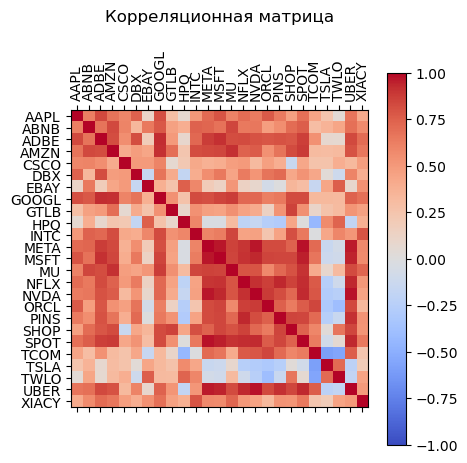

In [38]:
plt.figure(figsize=(16, 14), dpi=300)

# тепловая карта корреляционной матрицы
cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)

# добавление меток
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.title('Корреляционная матрица', pad=20)

plt.show()

<!-- **Определение:\
Акции с максимальной положительной корреляцией (max)\
Акции с максимальной отрицательной корреляцией (min)\
Акции с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)** -->

**4. Определение:\
&nbsp;    Акции с максимальной положительной корреляцией (max)\
&nbsp;    Акции с максимальной отрицательной корреляцией (min)\
&nbsp;    Акции с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)\
Для компании Netflix**

In [39]:
df_NFLX = correlation_matrix.drop(["NFLX"], axis=1)
df_NFLX = df_NFLX.loc[["NFLX"]].T
df_NFLX.head()

,NFLX
AAPL,0.701937
ABNB,0.646901
ADBE,0.821314
AMZN,0.735466
CSCO,0.497727


In [40]:
max_corr_id = df_NFLX.idxmax()[0]
df_NFLX.loc[[max_corr_id]]

,NFLX
UBER,0.937042


In [41]:
min_corr_id = df_NFLX.idxmin()[0]
df_NFLX.loc[[min_corr_id]]

,NFLX
TSLA,-0.251616


In [42]:
abs_min_corr = df_NFLX.fillna(0).abs().idxmin()[0]
df_NFLX.loc[[abs_min_corr]]

,NFLX
TWLO,-0.102302


**5. Диаграммы разброса**

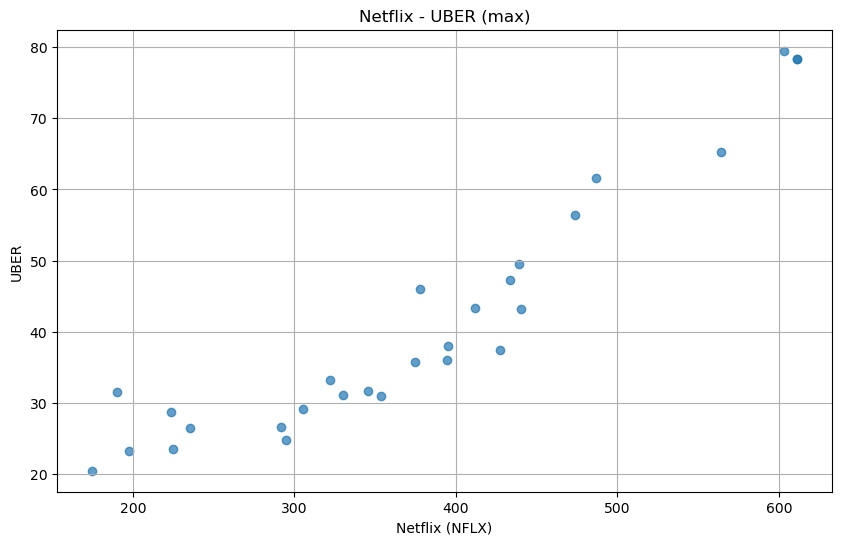

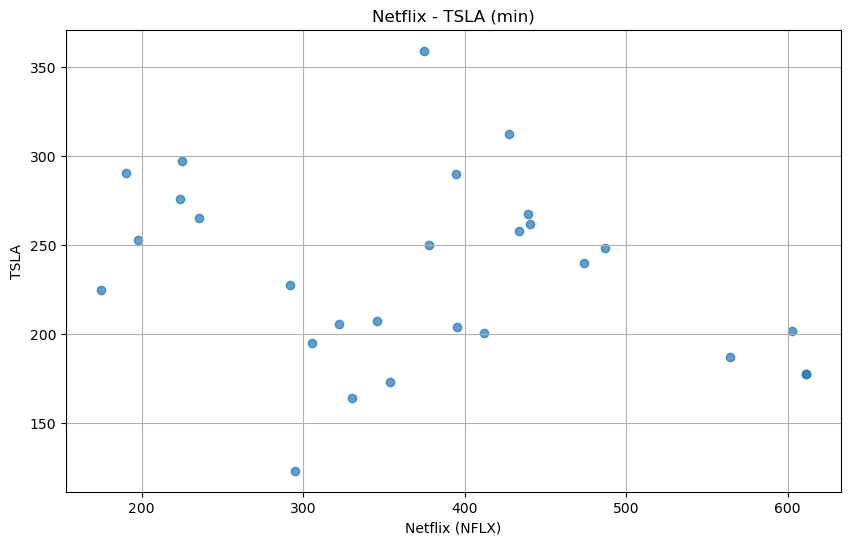

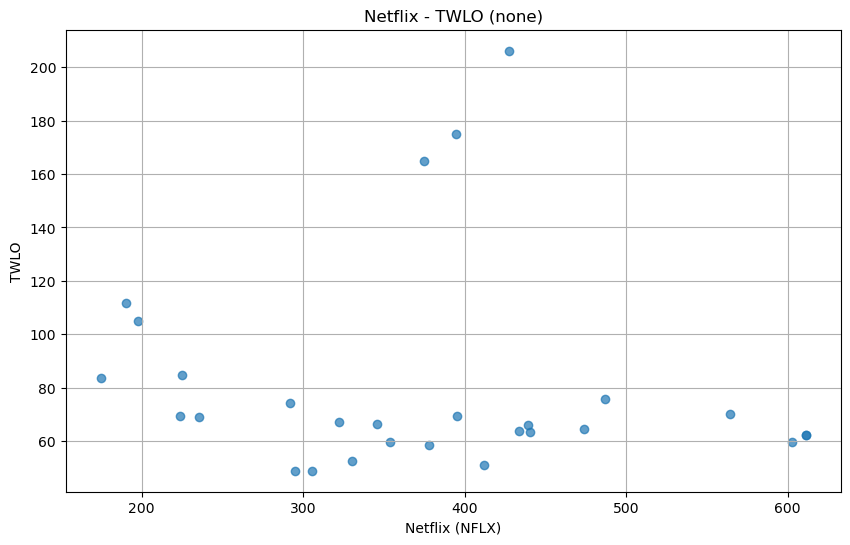

In [43]:
def plot_scatter(x, y, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(combined_df[x], combined_df[y], alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_scatter('NFLX', max_corr_id, 'Netflix (NFLX)', f'{max_corr_id}', f'Netflix - {max_corr_id} (max)')
plot_scatter('NFLX', min_corr_id, 'Netflix (NFLX)', f'{min_corr_id}', f'Netflix - {min_corr_id} (min)')
plot_scatter('NFLX', abs_min_corr, 'Netflix (NFLX)', f'{abs_min_corr}', f'Netflix - {abs_min_corr} (none)')

 **6. Cредняя цена акций для каждого месяца**

In [44]:
monthly_mean = combined_df.mean(axis=1)
monthly_mean

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
dtype: float64

**7. Графики для акций из пункта 4 и средней из пункта 6**

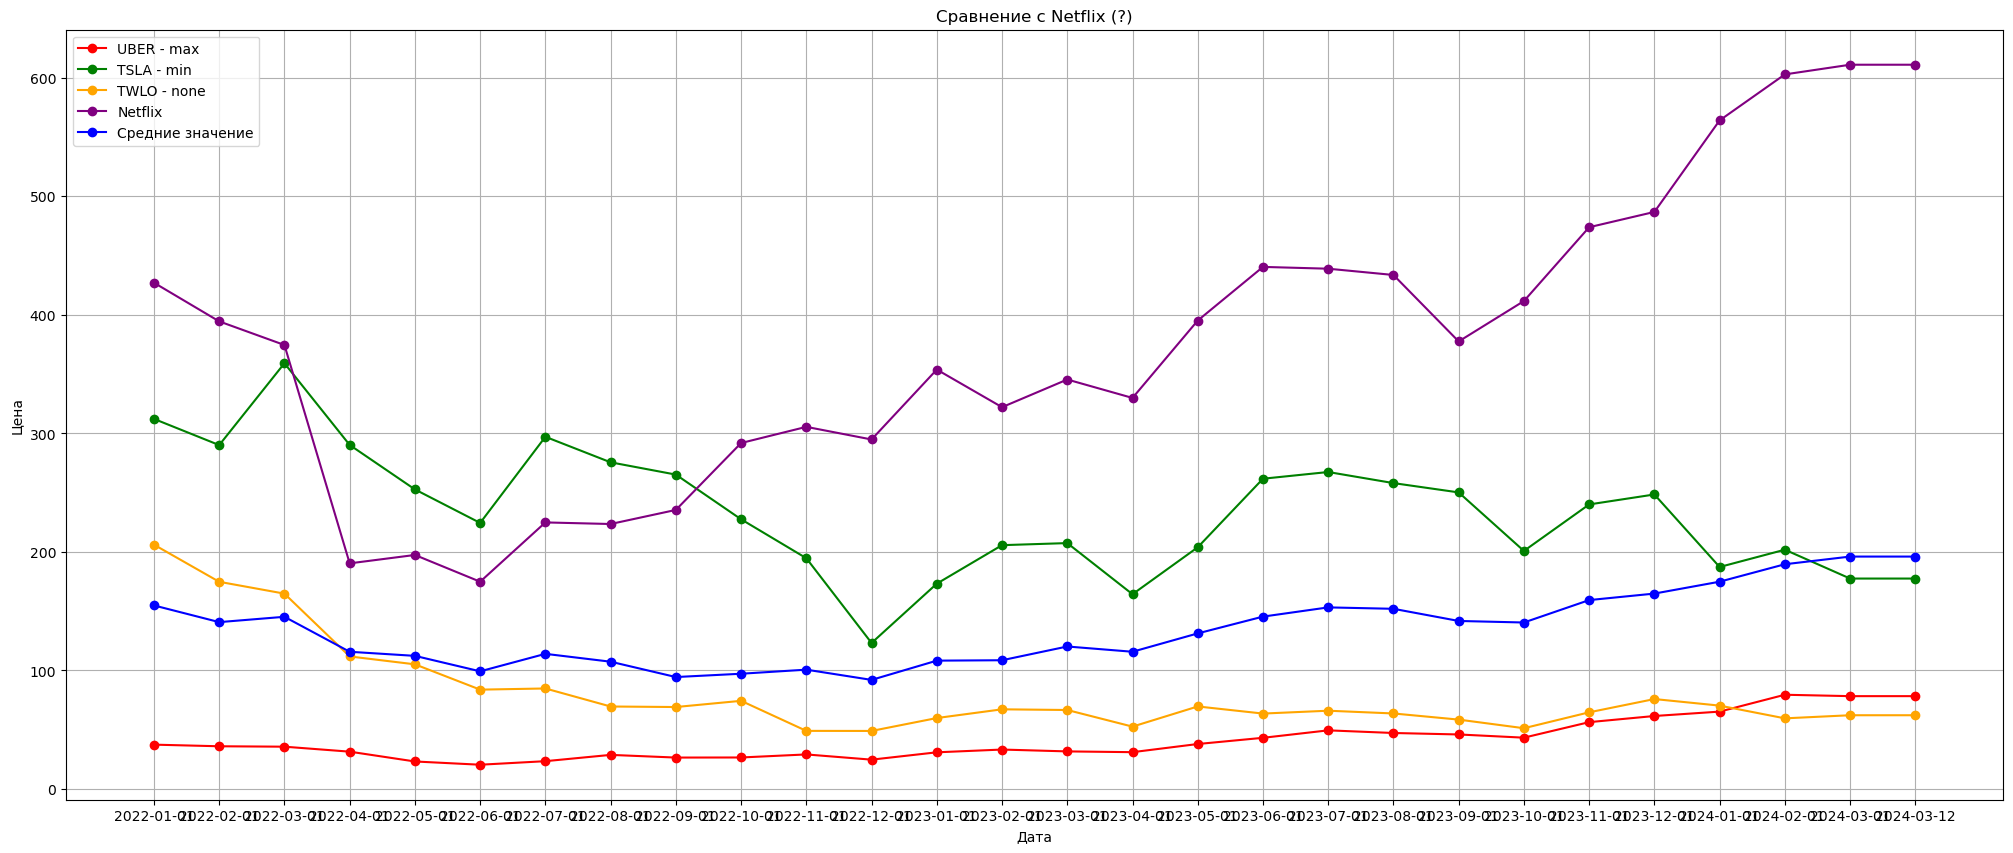

In [45]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.plot(combined_df[max_corr_id], color='red', marker='o', label=f'{max_corr_id} - max')
ax.plot(combined_df[min_corr_id], color='green', marker='o', label=f'{min_corr_id} - min')
ax.plot(combined_df[abs_min_corr], color='orange', marker='o', label=f'{abs_min_corr} - none')
ax.plot(combined_df['NFLX'], color='purple', marker='o', label='Netflix')
ax.plot(monthly_mean, color='blue', marker='o', label='Средние значение')

ax.set_xlabel("Дата")
ax.set_ylabel("Цена")

ax.legend()
ax.grid()

ax.set_title("Сравнение с Netflix (?)")

plt.show()

<h1>Вывод:</h1>
<br>
В результате выполнения работы был получен ценный опыт использования библиотек Python, таких как numpy, pandas и matplotlib для анализа данных на практических задачах.